In [1]:
cd /home/spotlight/git/deeplearning-seminar/code

/home/spotlight/git/deeplearning-seminar/code


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from Network import VAE

In [4]:
arch = [784,500,200,3]

In [5]:
v = VAE.VAE(arch)

Building tensorflow graph
Done constructing network


In [6]:
import input_data

In [7]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
v.train(mnist, num_epochs=30, plot_manifold = False)

[**] Begin training: 13:12:00.063706
epoch 0: avg cost: 179.07197517755662
epoch 1: avg cost: 150.017880362216
epoch 2: avg cost: 143.81340227272736
epoch 3: avg cost: 140.60026189630685
epoch 4: avg cost: 138.53113961292613
epoch 5: avg cost: 136.82311168323872
epoch 6: avg cost: 135.6603373224431


In [55]:
#mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
import csv
num_samples = 500000
num_epochs = num_samples // 55000
f = open('data_viz.csv', 'w')
writer = csv.writer(f)
for i in range(0, num_epochs):
    raw, labels = mnist.train.next_batch(55000)
    for raw, label in zip(raw, labels):
        z_mean, z_log_sigma = v.encode(raw.reshape(1, 784))
        data.append([label, z_mean[0][0], z_mean[0][1], z_mean[0][2]])
    print("encoded one epoch worth of data (55000 samples)")
print("lets go")
writer.writerows(data)
print("done writing")
f.close()

encoded one epoch worth of data (55000 samples)
encoded one epoch worth of data (55000 samples)
encoded one epoch worth of data (55000 samples)
encoded one epoch worth of data (55000 samples)
encoded one epoch worth of data (55000 samples)
encoded one epoch worth of data (55000 samples)
encoded one epoch worth of data (55000 samples)
encoded one epoch worth of data (55000 samples)
encoded one epoch worth of data (55000 samples)
lets go
done writing


In [54]:
mnist.train.num_examples

55000

In [20]:
labels

array([9, 2], dtype=uint8)

In [19]:
x = np.linspace(-3,3,20)

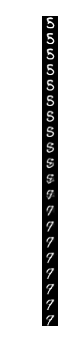

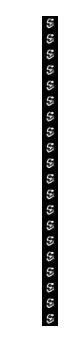

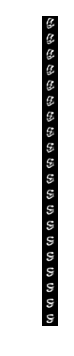

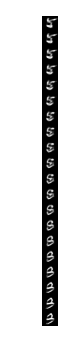

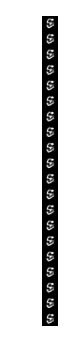

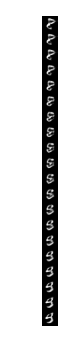

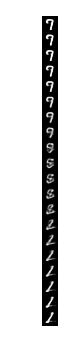

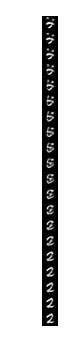

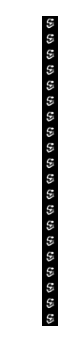

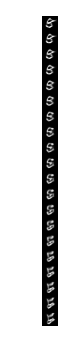

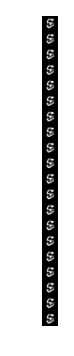

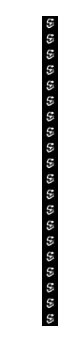

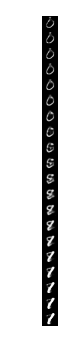

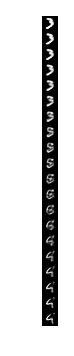

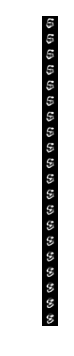

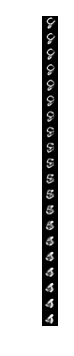

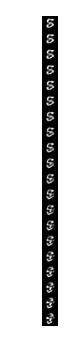

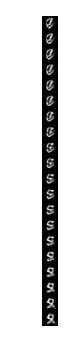

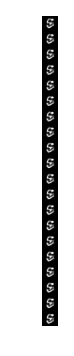

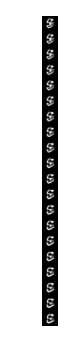

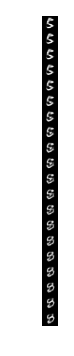

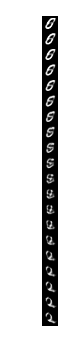

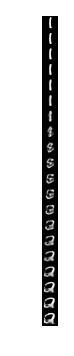

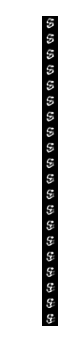

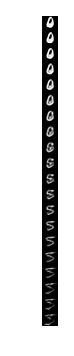

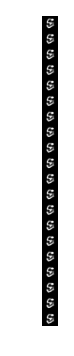

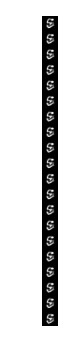

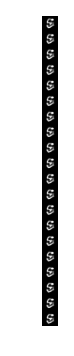

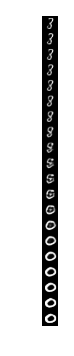

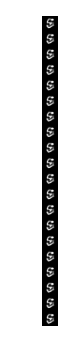

In [42]:
for i in range(0,30):
    v.plot_manifold(axis=(i,13), single_axis=True)
    plt.show('all')

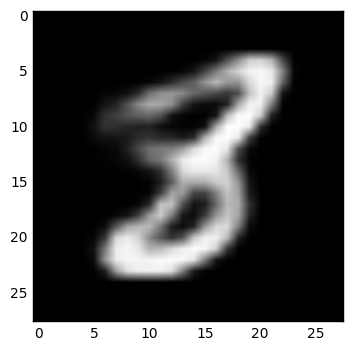

In [59]:
plt.imshow(v.decode().reshape(28,28), cmap=plt.cm.gray)

In [294]:
y


array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [35]:
import numpy as np
samples_1 = np.random.multivariate_normal(z_mean.flatten(), np.eye(2)*z_log_sigma**2,3)

In [86]:
num_samples = 200
samples = np.random.multivariate_normal(z_mean.flatten(), np.eye(2)*z_log_sigma**2,num_samples)
x = samples[:,0]
y = samples[:,1]

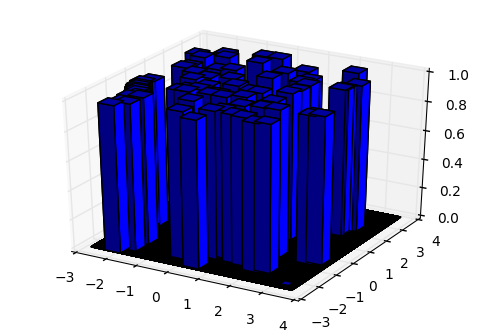

In [85]:
import matplotlib.pyplot as plt
import matplotlib.mlab
%matplotlib inline
num_samples = 200
samples = np.random.multivariate_normal(z_mean.flatten(), np.eye(2)*z_log_sigma**2,num_samples)
x = samples[:,0]
y = samples[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=200, range=[[-3, 3], [-3, 3]])
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
plt.show()

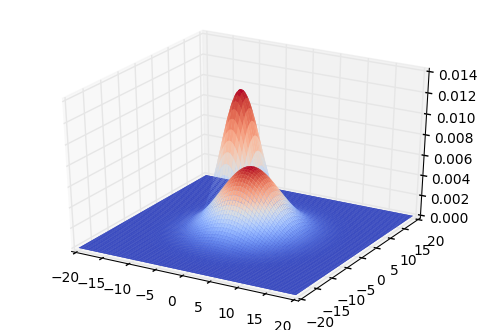

In [299]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, probs, rstride=5, cstride=5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
surf = ax.plot_surface(X2, Y2, probs2, rstride=5, cstride=5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
plt.savefig('dist.pdf')

In [296]:
from scipy.stats import multivariate_normal
var1 = multivariate_normal(mean=z_mean.flatten(), cov=np.eye(2)*z_log_sigma**2)
var2 = multivariate_normal(mean=z_mean2.flatten(), cov=np.eye(2)*z_log_sigma2**2)

In [297]:
start = -20
end   =  20
step_len = 0.1
xs = np.arange(start,end,step_len)
ys = np.arange(start,end,step_len)
X,Y = np.meshgrid(xs,ys)
coord = [(x,y) for x in xs for y in xs]
probs = var1.pdf(coord).reshape(X.shape)

In [298]:
start = -20
end   =  20
step_len = 0.1
xs2 = np.arange(start,end,step_len)
ys2 = np.arange(start,end,step_len)
X2,Y2 = np.meshgrid(xs2,ys2)
coord2 = [(x,y) for x in xs2 for y in xs2]
probs2 = var2.pdf(coord2).reshape(X2.shape)

In [284]:
print(X.shape)
print(Y.shape)
print(len(coord))
print(probs.shape) 

(400, 400)
(400, 400)
160000
(400, 400)


In [295]:
z_mean2

array([[-0.13366972,  0.31588092]], dtype=float32)

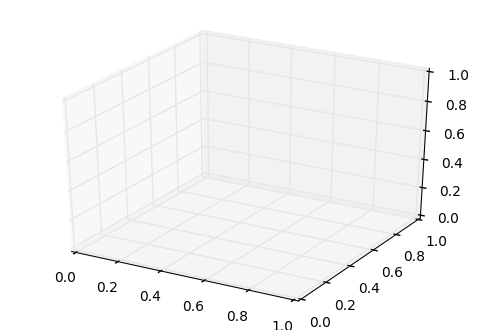

In [215]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

In [216]:
print(X.shape)
print(Y.shape)
print(Z.shape)

(40, 40)
(40, 40)
(40, 40)
